# Data Description

* ID – A unique identifier for each record.

* Country – The country of the patient.

* Age – Age of the patient.

* Gender – Gender of the patient (Male/Female).

* Tobacco Use – Whether the patient has used tobacco (Yes/No).

* Alcohol Consumption – Whether the patient consumes alcohol (Yes/No).

* HPV Infection – Presence of Human Papillomavirus infection (Yes/No).

* Betel Quid Use – Whether the patient has used betel quid (Yes/No).

* Chronic Sun Exposure – Whether the patient has prolonged sun exposure (Yes/No).

* Poor Oral Hygiene – Whether the patient has poor oral hygiene (Yes/No).

* Diet (Fruits & Vegetables Intake) – Dietary habits concerning fruit and vegetable intake (Good/Poor).

* Family History of Cancer – Whether the patient has a family history of cancer (Yes/No).

* Compromised Immune System – Whether the patient has a weakened immune system (Yes/No).

* Oral Lesions – Presence of oral lesions (Yes/No).

* Unexplained Bleeding – Presence of unexplained bleeding in the mouth (Yes/No).

* Difficulty Swallowing – Whether the patient has trouble swallowing (Yes/No).

* White or Red Patches in Mouth – Presence of abnormal patches in the mouth (Yes/No).

* Tumor Size (cm) – The size of the tumor in centimeters.

* Cancer Stage – The stage of oral cancer (e.g., 0, 1, 2, 3, 4).

* Treatment Type – The type of treatment received (e.g., No Treatment, Surgery, Radiation, Chemotherapy).

* Survival Rate (5-Year, %) – The estimated 5-year survival rate as a percentage.

* Cost of Treatment (USD) – The cost of treatment in US dollars.

* Economic Burden (Lost Workdays per Year) – Number of workdays lost per year due to the disease.

* Early Diagnosis – Whether the cancer was diagnosed early (Yes/No).

* Oral Cancer (Diagnosis) – Final diagnosis of oral cancer (Yes/No).

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
pd.set_option("display.max_columns",None)

In [107]:
oral_cancer=pd.read_csv("D:/GL/Capstone/Capstone_final/oral_cancer_prediction_dataset.csv")
oral_cancer.head()

,ID,Country,Age,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Tumor Size (cm),Cancer Stage,Treatment Type,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year),Early Diagnosis,Oral Cancer (Diagnosis)
0,1,Italy,36,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,No,No
1,2,Japan,64,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,1.782186,1,No Treatment,83.340103,77772.50,177,No,Yes
2,3,UK,37,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,3.523895,2,Surgery,63.222871,101164.50,130,Yes,Yes
3,4,Sri Lanka,55,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,0.000000,0,No Treatment,100.000000,0.00,0,Yes,No
4,5,South Africa,68,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,2.834789,3,No Treatment,44.293199,45354.75,52,No,Yes


In [108]:
# creating a copy of the dataframe
df=oral_cancer.copy()

In [109]:
# Checking the shape of the dataset
oral_cancer.shape

(84922, 25)

In [110]:
# Checking the null values
oral_cancer.isnull().sum()

ID                                          0
Country                                     0
Age                                         0
Gender                                      0
Tobacco Use                                 0
Alcohol Consumption                         0
HPV Infection                               0
Betel Quid Use                              0
Chronic Sun Exposure                        0
Poor Oral Hygiene                           0
Diet (Fruits & Vegetables Intake)           0
Family History of Cancer                    0
Compromised Immune System                   0
Oral Lesions                                0
Unexplained Bleeding                        0
Difficulty Swallowing                       0
White or Red Patches in Mouth               0
Tumor Size (cm)                             0
Cancer Stage                                0
Treatment Type                              0
Survival Rate (5-Year, %)                   0
Cost of Treatment (USD)           

* No evident null values are present

In [111]:
# Checking data types
oral_cancer.dtypes

ID                                            int64
Country                                      object
Age                                           int64
Gender                                       object
Tobacco Use                                  object
Alcohol Consumption                          object
HPV Infection                                object
Betel Quid Use                               object
Chronic Sun Exposure                         object
Poor Oral Hygiene                            object
Diet (Fruits & Vegetables Intake)            object
Family History of Cancer                     object
Compromised Immune System                    object
Oral Lesions                                 object
Unexplained Bleeding                         object
Difficulty Swallowing                        object
White or Red Patches in Mouth                object
Tumor Size (cm)                             float64
Cancer Stage                                  int64
Treatment Ty

In [112]:
# Checking duplicates
oral_cancer.duplicated().sum()

0

* No duplicate values are also present

## Separating numeric and categoric Columns

In [113]:
numeric_cols=oral_cancer.select_dtypes(include=np.number).columns.to_list()
print("Numeric columns: ",numeric_cols)

Numeric columns:  ['ID', 'Age', 'Tumor Size (cm)', 'Cancer Stage', 'Survival Rate (5-Year, %)', 'Cost of Treatment (USD)', 'Economic Burden (Lost Workdays per Year)']


In [114]:
categoric_cols=oral_cancer.select_dtypes(include='object').columns.to_list()
print("Categoric Columns: ",categoric_cols)

Categoric Columns:  ['Country', 'Gender', 'Tobacco Use', 'Alcohol Consumption', 'HPV Infection', 'Betel Quid Use', 'Chronic Sun Exposure', 'Poor Oral Hygiene', 'Diet (Fruits & Vegetables Intake)', 'Family History of Cancer', 'Compromised Immune System', 'Oral Lesions', 'Unexplained Bleeding', 'Difficulty Swallowing', 'White or Red Patches in Mouth', 'Treatment Type', 'Early Diagnosis', 'Oral Cancer (Diagnosis)']


In [115]:
oral_cancer[numeric_cols]

,ID,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
0,1,36,0.000000,0,100.000000,0.00,0
1,2,64,1.782186,1,83.340103,77772.50,177
2,3,37,3.523895,2,63.222871,101164.50,130
3,4,55,0.000000,0,100.000000,0.00,0
4,5,68,2.834789,3,44.293199,45354.75,52
...,...,...,...,...,...,...,...
84917,84918,46,0.000000,0,100.000000,0.00,0
84918,84919,41,0.000000,0,100.000000,0.00,0
84919,84920,72,4.777394,1,85.633426,81352.50,90
84920,84921,67,0.000000,0,100.000000,0.00,0


In [116]:
# Unique values in each column
for i in categoric_cols:
    if i != 'ID':
        print(f"Unique value for column {i} \n",oral_cancer[i].unique())

Unique value for column Country 
 ['Italy' 'Japan' 'UK' 'Sri Lanka' 'South Africa' 'Taiwan' 'USA' 'Germany'
 'France' 'Australia' 'Brazil' 'Pakistan' 'Kenya' 'Russia' 'Nigeria'
 'Egypt' 'India']
Unique value for column Gender 
 ['Female' 'Male']
Unique value for column Tobacco Use 
 ['Yes' 'No']
Unique value for column Alcohol Consumption 
 ['Yes' 'No']
Unique value for column HPV Infection 
 ['Yes' 'No']
Unique value for column Betel Quid Use 
 ['No' 'Yes']
Unique value for column Chronic Sun Exposure 
 ['No' 'Yes']
Unique value for column Poor Oral Hygiene 
 ['Yes' 'No']
Unique value for column Diet (Fruits & Vegetables Intake) 
 ['Low' 'High' 'Moderate']
Unique value for column Family History of Cancer 
 ['No' 'Yes']
Unique value for column Compromised Immune System 
 ['No' 'Yes']
Unique value for column Oral Lesions 
 ['No' 'Yes']
Unique value for column Unexplained Bleeding 
 ['No' 'Yes']
Unique value for column Difficulty Swallowing 
 ['No' 'Yes']
Unique value for column White or

### 5-point summary of the numeric columns

In [117]:
oral_cancer[numeric_cols].drop(['ID'],axis=1).describe()

,Age,Tumor Size (cm),Cancer Stage,"Survival Rate (5-Year, %)",Cost of Treatment (USD),Economic Burden (Lost Workdays per Year)
count,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000,84922.000000
mean,54.509444,1.747294,1.118756,79.503364,39109.881244,52.028391
std,10.014839,2.028199,1.340418,26.483746,44710.687054,60.389796
min,15.000000,0.000000,0.000000,10.000750,0.000000,0.000000
25%,48.000000,0.000000,0.000000,65.233425,0.000000,0.000000
50%,55.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,61.000000,3.480075,2.000000,100.000000,76468.437500,104.000000
max,101.000000,5.999899,4.000000,100.000000,159988.000000,179.000000


### 5-point summary of the categoric columns

In [118]:
oral_cancer[categoric_cols].describe().T

,count,unique,top,freq
Country,84922,17,India,8079
Gender,84922,2,Male,60351
Tobacco Use,84922,2,Yes,67989
Alcohol Consumption,84922,2,Yes,50939
HPV Infection,84922,2,No,59525
Betel Quid Use,84922,2,No,60299
Chronic Sun Exposure,84922,2,No,68057
Poor Oral Hygiene,84922,2,No,42627
Diet (Fruits & Vegetables Intake),84922,3,Moderate,33914
Family History of Cancer,84922,2,No,76508


### Visualizing numeric columns

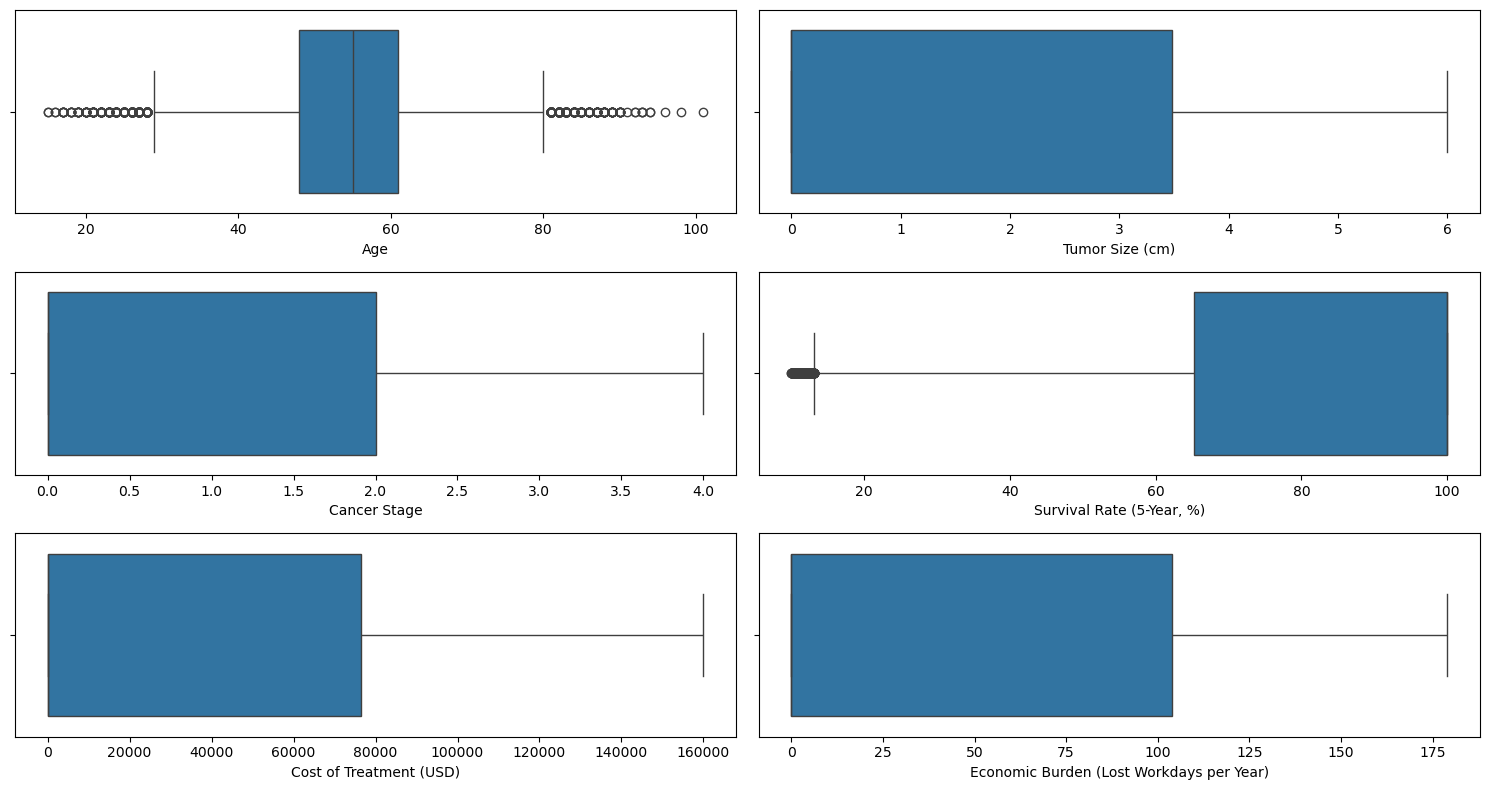

In [119]:
plt.figure(figsize=(15,8))
t=1
for i in numeric_cols:
    if i !='ID':
        plt.subplot(3,2,t)
        sns.boxplot(x=df[i])
        t+=1
plt.tight_layout()
plt.show()

### Checking the density

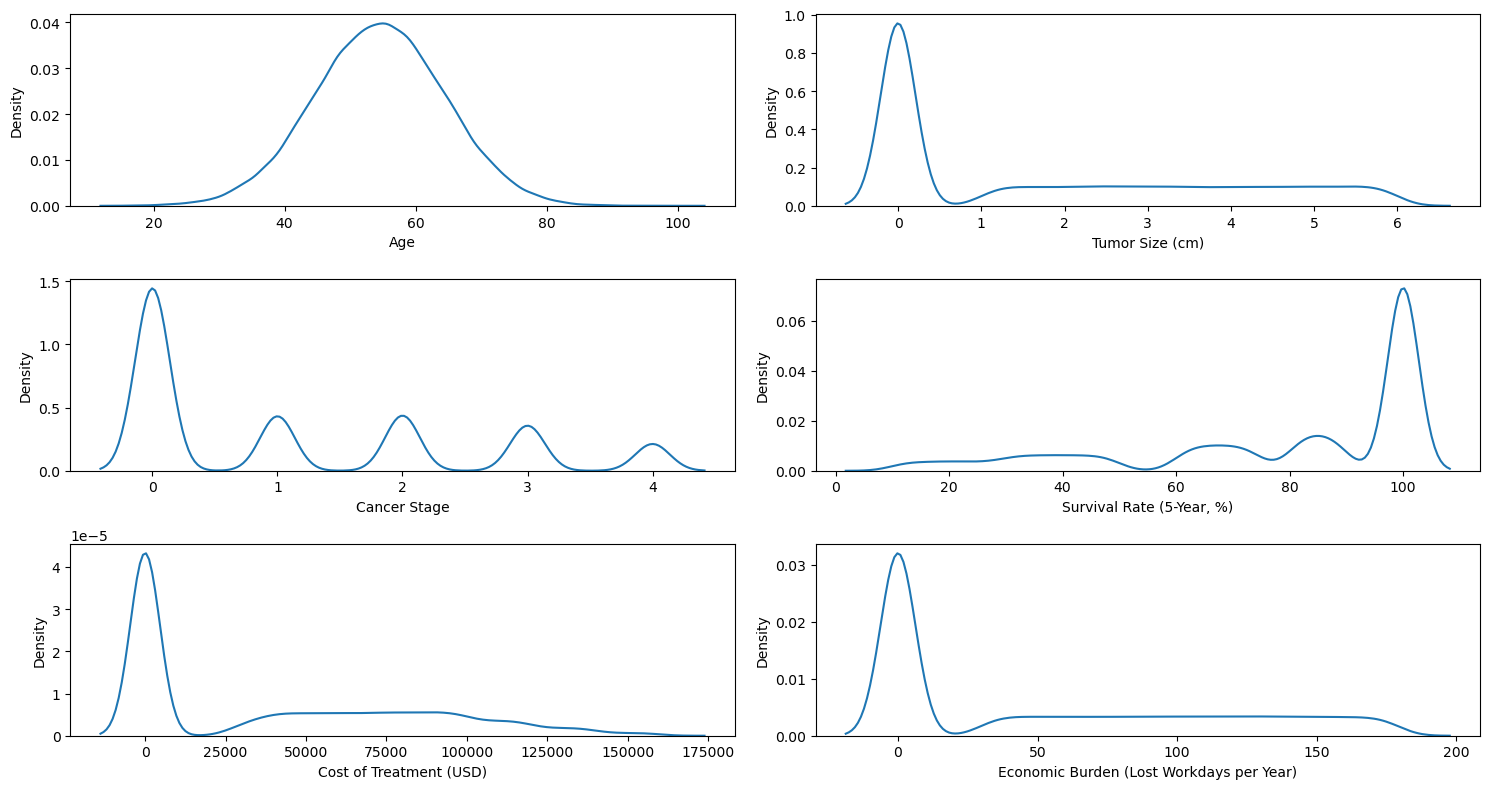

In [120]:
plt.figure(figsize=(15,8))
t=1
for i in numeric_cols:
    if i !='ID':
        plt.subplot(3,2,t)
        sns.kdeplot(x=df[i])
        t+=1
plt.tight_layout()
plt.show()

* 50% of people are of age 55
* There are some people present below age of 30
* There are some people present greater than the age of 80

* From the boxplot and the 5-point summary it can be seen that the tumor size is 0 for 50% of people
* Tumor size in some people lies between 3.5 cm to 6 cm

* Around 75% and more people have cancer stage between 2 and 4

* For 25% of people, the estimated 5-year survival rate percentage is 65% but the survival rate percentage is more for 50% to 75% of people

* The cost of treatment for most of the people is 0.
* But there are people whose cost of treatment also ranges from 25000 to 17500

* Most people lost 0 workdays per year
* But There are people who lost 50 to 175 workdays per week.

In [121]:
oral_cancer[categoric_cols]

,Country,Gender,Tobacco Use,Alcohol Consumption,HPV Infection,Betel Quid Use,Chronic Sun Exposure,Poor Oral Hygiene,Diet (Fruits & Vegetables Intake),Family History of Cancer,Compromised Immune System,Oral Lesions,Unexplained Bleeding,Difficulty Swallowing,White or Red Patches in Mouth,Treatment Type,Early Diagnosis,Oral Cancer (Diagnosis)
0,Italy,Female,Yes,Yes,Yes,No,No,Yes,Low,No,No,No,No,No,No,No Treatment,No,No
1,Japan,Male,Yes,Yes,Yes,No,Yes,Yes,High,No,No,No,Yes,No,No,No Treatment,No,Yes
2,UK,Female,No,Yes,No,No,Yes,Yes,Moderate,No,No,No,No,No,Yes,Surgery,Yes,Yes
3,Sri Lanka,Male,Yes,Yes,No,Yes,No,Yes,Moderate,No,No,Yes,No,No,No,No Treatment,Yes,No
4,South Africa,Male,No,No,No,No,No,Yes,High,No,No,No,No,No,No,No Treatment,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84917,USA,Male,Yes,No,No,No,No,Yes,Moderate,No,No,No,No,No,Yes,No Treatment,Yes,No
84918,USA,Male,Yes,Yes,No,No,No,No,Moderate,No,Yes,No,No,Yes,Yes,No Treatment,Yes,No
84919,Taiwan,Male,Yes,Yes,No,Yes,No,Yes,High,Yes,No,No,No,No,No,Surgery,No,Yes
84920,Japan,Male,Yes,No,No,No,No,No,Low,No,No,Yes,No,Yes,No,No Treatment,Yes,No


In [122]:
for i in categoric_cols:
    print(f"Value count of column {i} \n",oral_cancer[i].value_counts(normalize=True))

Value count of column Country 
 Country
India           0.095134
Pakistan        0.094216
Sri Lanka       0.094204
Taiwan          0.093085
UK              0.058053
Germany         0.057806
USA             0.057594
Italy           0.056923
France          0.056322
Brazil          0.056075
Russia          0.055474
Egypt           0.038423
Nigeria         0.038341
Australia       0.037552
Kenya           0.037340
Japan           0.037116
South Africa    0.036339
Name: proportion, dtype: float64
Value count of column Gender 
 Gender
Male      0.710664
Female    0.289336
Name: proportion, dtype: float64
Value count of column Tobacco Use 
 Tobacco Use
Yes    0.800605
No     0.199395
Name: proportion, dtype: float64
Value count of column Alcohol Consumption 
 Alcohol Consumption
Yes    0.599833
No     0.400167
Name: proportion, dtype: float64
Value count of column HPV Infection 
 HPV Infection
No     0.700937
Yes    0.299063
Name: proportion, dtype: float64
Value count of column Betel Quid U

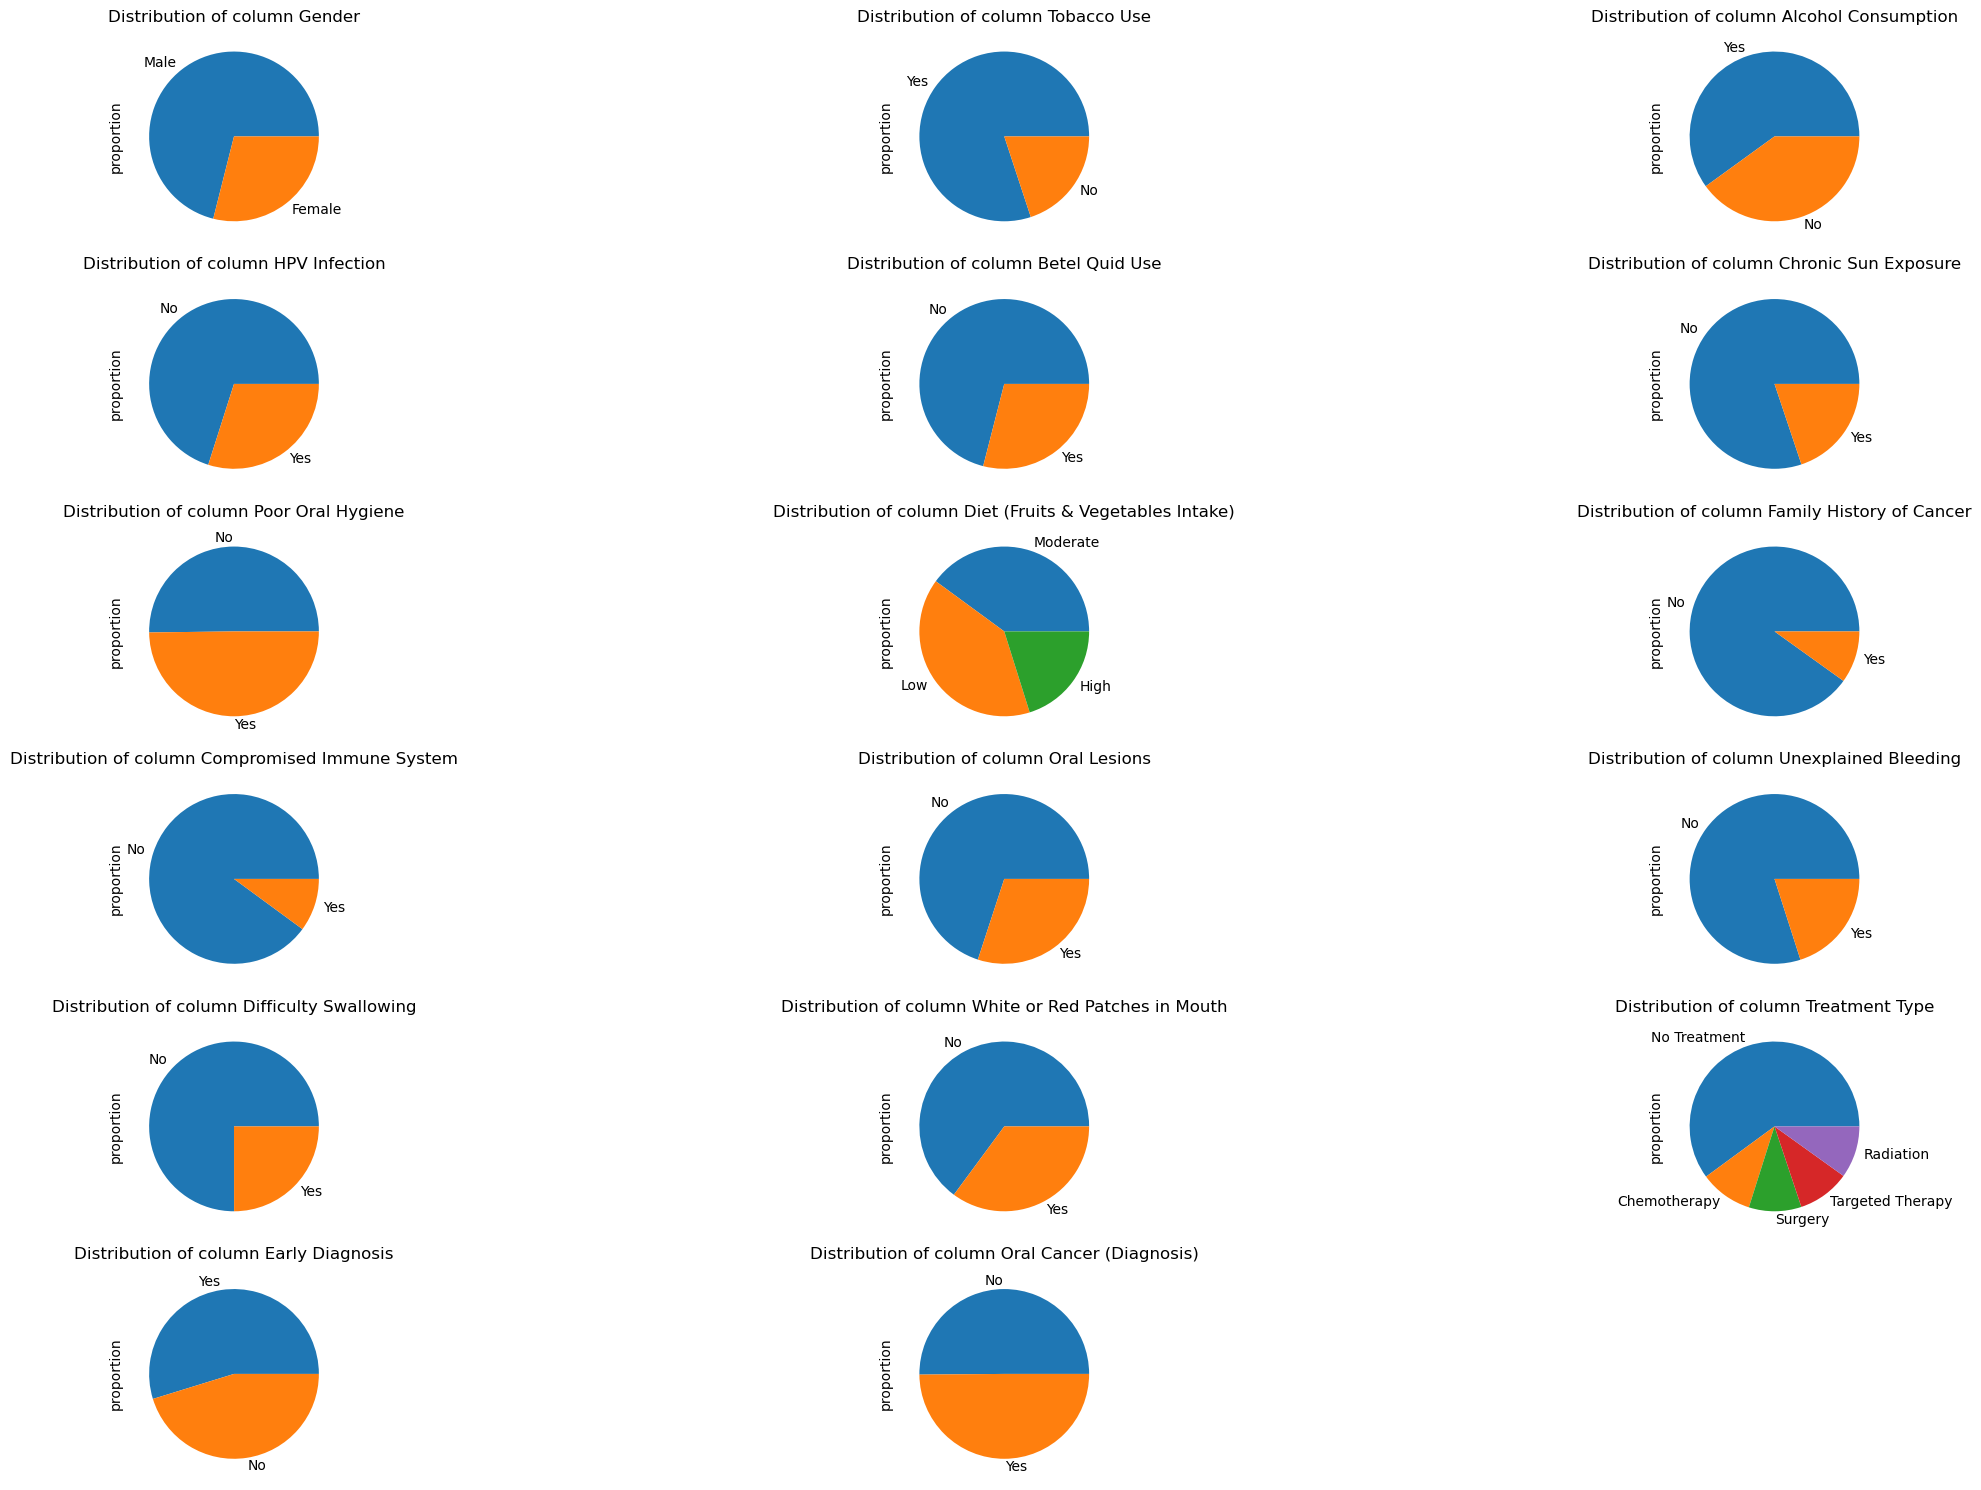

In [123]:
plt.figure(figsize=(25,15))
t=1
for i in categoric_cols:
    if i !='Country':
        plt.subplot(6,3,t)
        oral_cancer[i].value_counts(normalize=True).plot(kind='pie')
        plt.title(f"Distribution of column {i}")
        t+=1
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

## Bi-variate Analysis

#### Num VS Target

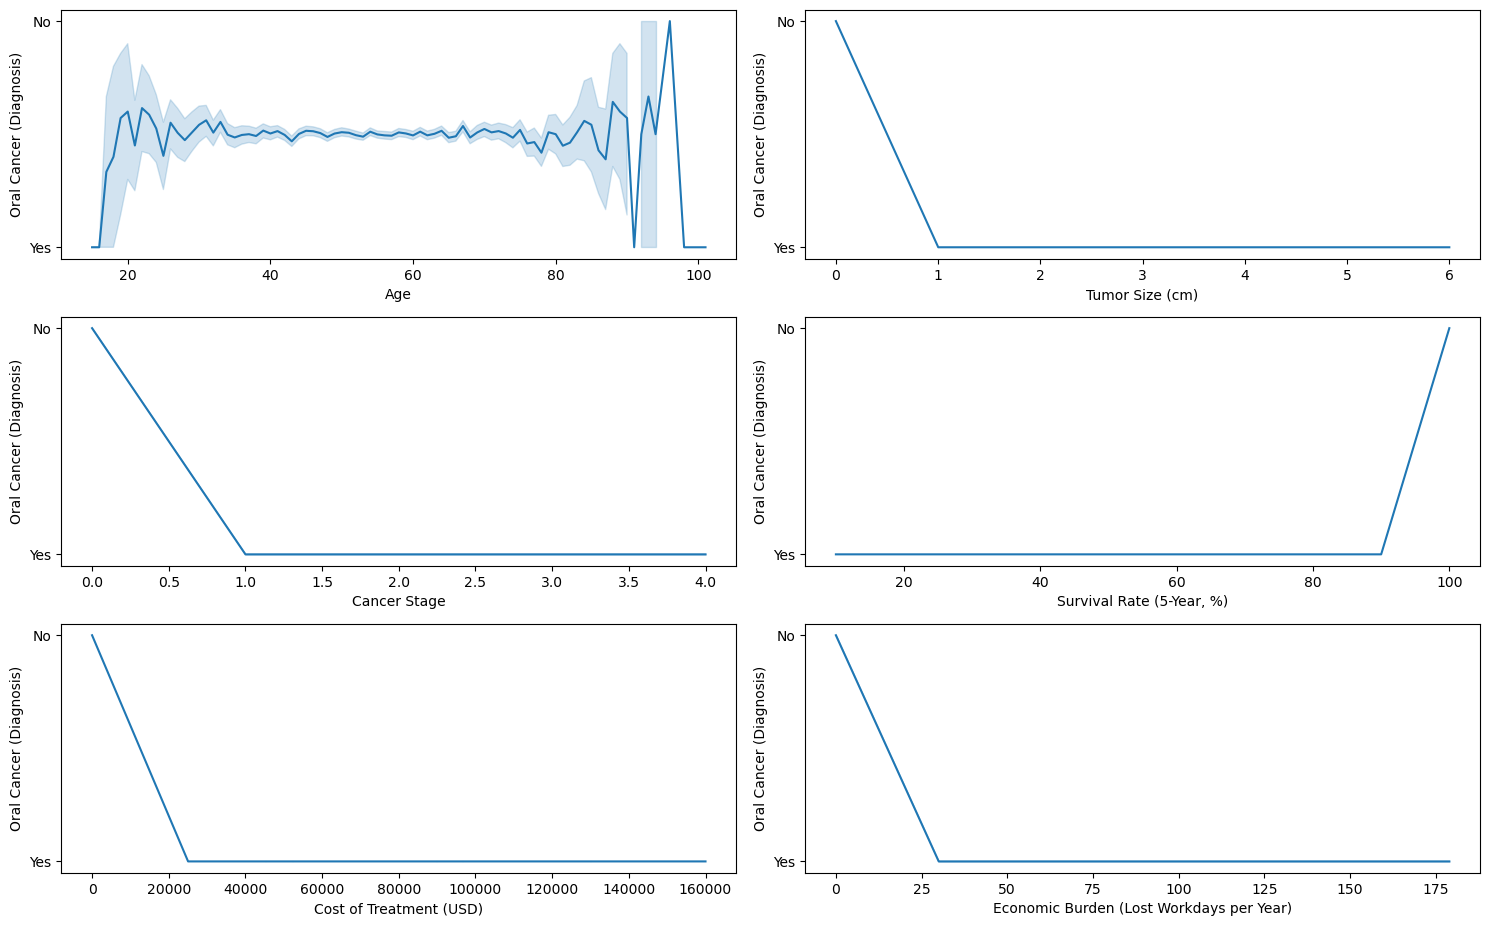

In [124]:
plt.figure(figsize=(15,12))
t=1
for i in numeric_cols:
    if i!='ID':
        plt.subplot(4,2,t)
        sns.lineplot(data=oral_cancer,y='Oral Cancer (Diagnosis)',x=i)
        t+=1

plt.tight_layout()
plt.show()

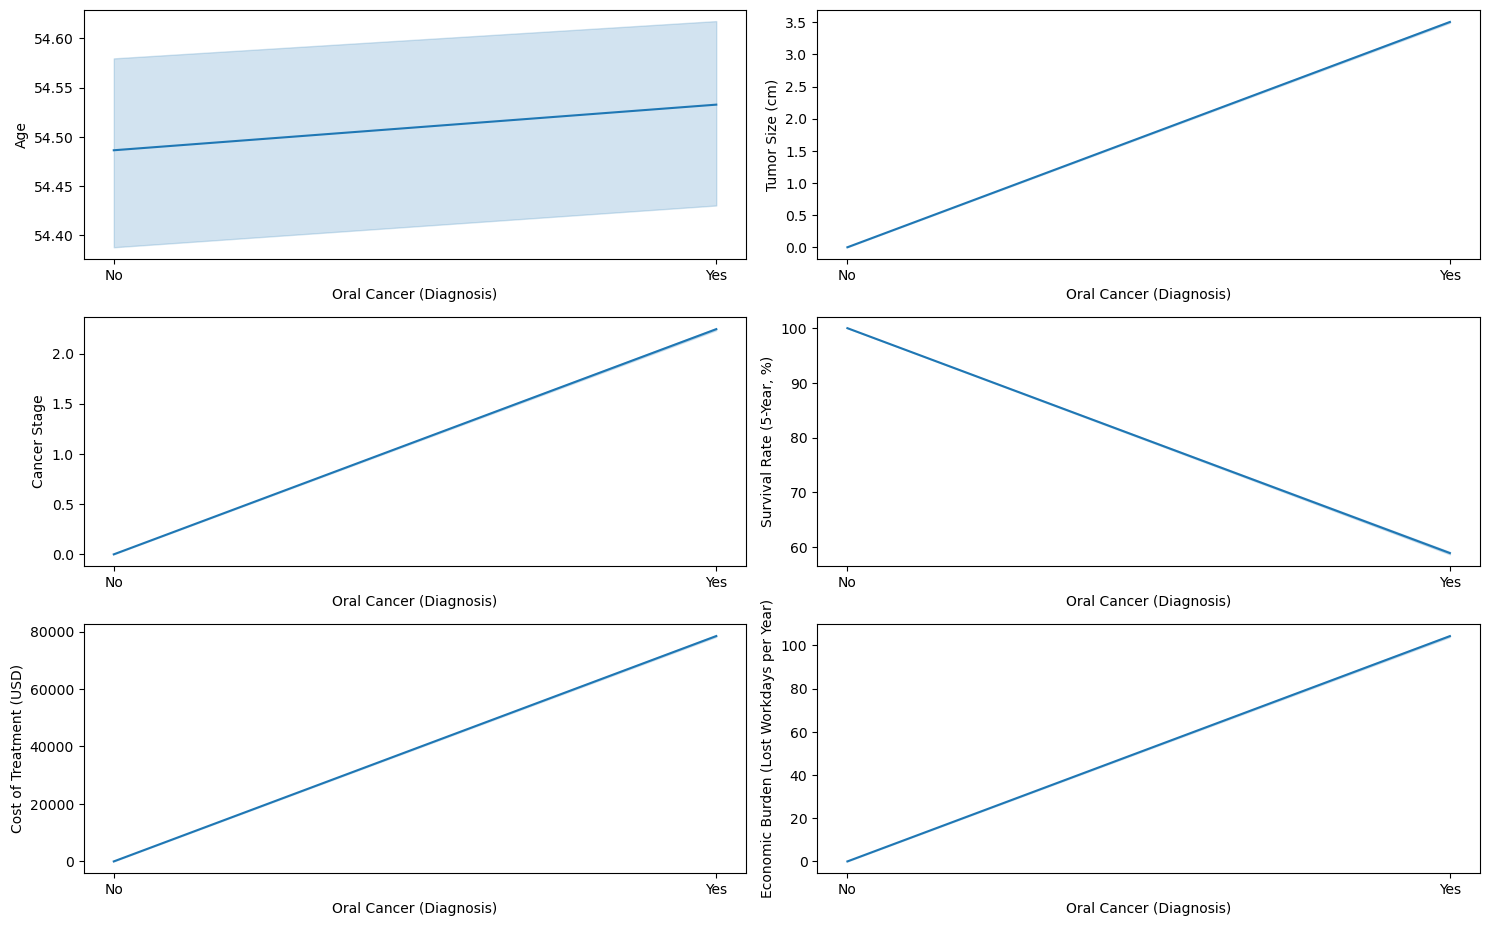

In [125]:
plt.figure(figsize=(15,12))
t=1
for i in numeric_cols:
    if i!='ID':
        plt.subplot(4,2,t)
        sns.lineplot(data=oral_cancer,x='Oral Cancer (Diagnosis)',y=i)
        t+=1

plt.tight_layout()
plt.show()

* Age vs Oral Cancer (Diagnosis): As the age increasing there is a chance that he/she may have oral cancer
* Tumor Size vs Oral Cancer (Diagnosis): There is a chance of having oral cancer if tumor is present
* Cancer Stage vs Oral Cancer (Diagnosis): Cancer stage and Oral Cancer (Diagnosis) are correlated.
* Survival Rate vs Oral Cancer (Diagnosis): The survival rate decreases if the person is having oral cancer
* Cost of Treatment vs Oral Cancer (Diagnosis): The cost of treatment will increase if the person is detected as having oral cancer
* Economic burder lost per year vs Oral Cancer (Diagnosis):The Economic burder lost per year is less if the person is detected of oral cancer 
  

#### Categorical columns VS Target Column